# Gradient Boost Model for Regression
##### Using Gradient Boosting to predict the price of an automobile

Decision Trees
- Decision Tree models are what make up gradient boosting in scikit learn
- CART Tree (Classification & Regression Tree) as the name suggests it can be used for both classification & regression problems
- in a decision tree model we have two ways to measure impurity & both yeild similar trees
  - Gini impurity
    - CART seeks to minimize Gini impurity at each node
    - Gini impurity is found from rule violations in training data
    - Gini impurity can also be found at non leaf nodes
  - Entropy
- One advantage of Decision Trees is that it is 'White Box' ML
- Decision Trees are Non-Parametric not many hyperparameter's to tune
- Decision Trees require not much data preparation
- Decision Trees are highly prone to overfitting which is a common risk with non-parametric ML models
- Overfitted models tend to be high variance models which means small changes in data cause big changes in model this is what makes Decision Trees slightly unstable
- The decision tree overfitting problem can be mitigated by using Random Forest it works on the principle "If everyone in the room is thinking the same thing, then somebody isn't thinking" - General Patton, 

Random forests
- Are a collection of decision tree models, every tree has been trained on a random sample of data with different datasets for each tree the output of all these trees are then combined together to get the final predicted label
- If you are using random forests for regression then we just average the outputs of all the trees
- If you are using random forests for classification then we use the mode of the outputs which will be the most frequently occuring output of all the random trees
- Is an extremely powerfull technique
- Is an example of ensemble learning
- Works best when the individual trees are as different as possible

Gradient Boosting
- Is a form of Ensemble learning where the word Ensemble is 'Together' in French
- Works on the principle "Build up your weaknesses until they become your strong points - Knute Rockne"
- Uses many weak decision tree models in order to build a strong one
- every new tree learns & corrects the mistakes made by the previous tree
- Tries to boost the performance of the final model by having many ml models come together to work on the training data
- Will not work if the weak learners use MSE regression
- Will work well with Regression using Decision trees
- works best with a large number of weak learners
- In GB early learners learn the most
- Later learners learn from the mistakes of early learners
- Uses Shrinkage Factor it is a mltiplicative term which is applied to each one of the weak learners
- High shrinkage factor scales down importance of each learner
- Objective of the shrinkage factor is to slow down the learning process (Slower the learning less Overfitted is the model)
- Shrinkage factor is way of forcing subsequent learners to focus on the important patterns on the data
- If there are a large number of learners then set the shrinkage factor such that learners shrink a lot, set the shrinkage factor to less than 1
- If the learners are few then we will shrink just a little bit thus the shrinkage factor should be close to 1


Ensemble learning
- Is a standard regularization technique
- Reduces overfitting & variance error


In [1]:
import pandas as pd

### Download the Automobile data set
<b>Download Link</b>https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<b>Summary:</b> Predict the price of a vehicle given other information about it

In [3]:
auto_data = pd.read_csv('../data/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Fill missing values with NaN

In [4]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Information about numeric fields in our dataframe

In [5]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Information about all fields in our dataframe

In [6]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,6692
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


#### What data type is price?

In [7]:
auto_data['price'].describe()

count      201
unique     186
top       6692
freq         2
Name: price, dtype: object

#### Convert the values in the price column to numeric values
If conversion throws an error set to NaN (by setting errors='coerce')

In [8]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 

In [9]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

#### Dropping a column which we deem unnecessary

In [10]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [11]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


#### Horsepower is also non-numeric...

In [12]:
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

#### ...so this is also converted to a numeric value

In [13]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 

In [14]:
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [15]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [16]:
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)

auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


#### All other non-numeric fields can be made into usable features by applying one-hot-encoding

In [17]:
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 
                                    'body-style', 'drive-wheels', 'engine-location', 
                                   'engine-type', 'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


#### Drop rows containing missing values

In [18]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.4,...,0,0,0,0,0,0,0,1,0,0
10,2,101.2,176.8,64.8,54.3,2395,4,108,3.5,2.8,...,0,0,0,0,0,0,0,1,0,0


#### Verify that there are no null values in the data set

In [19]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


#### Create training and test data using train_test_split

In [20]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Gradient Boosting:
* Start off by learning a very simple model
* Take the error residuals from the first model and then try to predict the errors in the next iteration (also with a simple learner)
* Combine the two simple models to obtain a slightly better overall model
* At each iteration, the learner tries to reduce the errors (not eliminate it) by a certain learning rate. This is also the gradient of the model
* Keep iterating over the error residuals until you have an ensemble of simple learners which combine to produce a more complex model

#### Parameters:
- <b>n_estimators:</b> Number of boosting stages
- <b>max_depth:</b> Maximum depth of each estimator tree
- <b>min_samples_split: </b>Minimum samples in each subset when splitting the data set
- <b>learning_rate: </b>Defines the rate at which to converge to the optimal value
- <b>loss: </b>Type of loss function to optimize (ls == least squares)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

/0/dev/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

#### Get R-square on training data

In [22]:
gbr_model.score(X_train, Y_train)

0.9983862634096469

#### Make predictions on test data and compare with actual values

In [23]:
y_predict = gbr_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


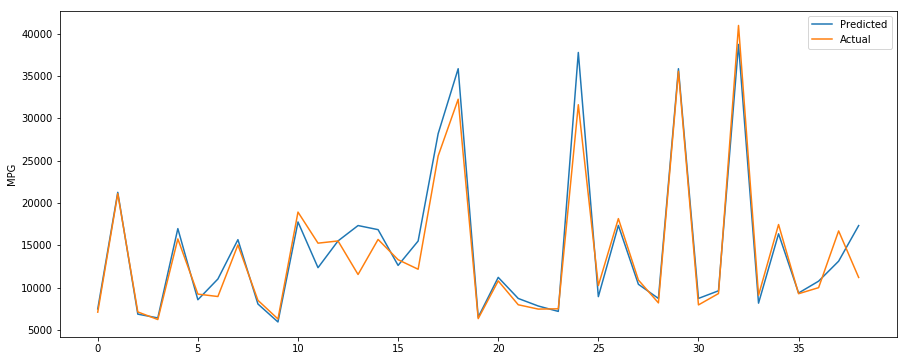

In [24]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

#### Calculate R-square score on test data

In [25]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.9335701362070417

#### Calculate Mean Square Error

In [26]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

4714764.456275816

#### Root of Mean Square Error

In [27]:
import math

math.sqrt(gbr_model_mse)

2171.3508367548106

### num_estimators vs learning_rate:
- Higher learning rate should result in convergence with fewer estimators
- High value for learning rate risks skipping the optimal solution
- Low learning rate equates to high bias, high rate to high variance
- Need to strike the right balance between num_estimators and learning_rate

In [28]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='ls'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

#### Analyze the results of the grid search

In [29]:
grid_search.cv_results_

{'mean_fit_time': array([0.04694565, 0.09400296, 0.21160301, 0.07240756, 0.13583946,
        0.32154822, 0.08809431, 0.17324305, 0.45466113, 0.04328307,
        0.08896677, 0.18322277, 0.06856767, 0.13734659, 0.30218768,
        0.09576511, 0.18217667, 0.46177506, 0.04884426, 0.08153327,
        0.19373298, 0.06554437, 0.1295255 , 0.28039797, 0.09815733,
        0.1874543 , 0.36969209, 0.03744078, 0.07039634, 0.17199071,
        0.05859534, 0.10643927, 0.25539001, 0.10553137, 0.164416  ,
        0.32330672]),
 'std_fit_time': array([0.00357431, 0.00902934, 0.00329365, 0.00866002, 0.00686693,
        0.01965354, 0.0030648 , 0.00850303, 0.03322777, 0.0007123 ,
        0.00354019, 0.00832299, 0.00385256, 0.01579352, 0.00680924,
        0.00252137, 0.01226727, 0.01584861, 0.00176104, 0.00148857,
        0.00730136, 0.0015778 , 0.01197625, 0.01822973, 0.00530813,
        0.00881589, 0.00551363, 0.00131477, 0.00212602, 0.00468609,
        0.00264559, 0.00252948, 0.00954198, 0.00551528, 0.012

#### Extract the useful values from the Grid Search results

In [30]:
for i in range(36):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])
    print()

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Mean Test Score:  0.7166469393475544
Rank:  36

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean Test Score:  0.837420992120999
Rank:  30

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean Test Score:  0.864278920610211
Rank:  9

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Mean Test Score:  0.7255138641594363
Rank:  34

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Mean Test Score:  0.8384331707083075
Rank:  28

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Mean Test Score:  0.8604857634386642
Rank:  11

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
Mean Test Score:  0.7229822734121442
Rank:  35

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}
Mean Test Score:  0.8365773481110128
Rank:  33

Parameters:  {'learning_rat

In [31]:
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

#### Compare predictions vs actual values

In [32]:
y_predict = gbr_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


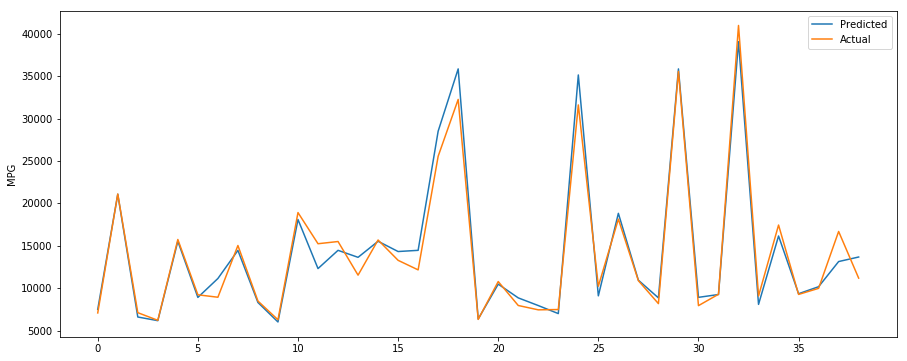

In [33]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

#### R-square on test data

In [34]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.967200332346957

In [35]:
gbr_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(gbr_model_mse)

1525.7488138980527